In [2]:
import logging
import pathlib
import typing

import cltrier_lib as lib
import pandas as pd

import llm_moral_values as llmv

logging.getLogger().setLevel(logging.INFO)

AttributeError: module 'cltrier_lib.inference.schemas' has no attribute 'Models'

In [ ]:
typing.get_args(lib.inference.schemas.Models)

('llama3.1:8b-instruct-q6_K',
 'llama2:70b-chat-q6_K',
 'llama3:70b-instruct-q6_K',
 'llama3.1:70b-instruct-q6_K',
 'mistral:7b-instruct-v0.2-q6_K',
 'mixtral:8x22b-instruct-v0.1-q6_K',
 'mixtral:8x7b-instruct-v0.1-q6_K',
 'phi3:14b-medium-128k-instruct-q6_K',
 'gemma:7b-instruct-q6_K',
 'gemma2:27b-instruct-q6_K',
 'qwen:72b-chat-v1.5-q6_K',
 'qwen2:72b-instruct-q6_K')

In [ ]:
PERSONA_ORDER = ["liberal", "moderate", "conservative"]
MODEL_ORDER = [model.name for model in llmv.schemas.Model.from_inference_selection()]

In [ ]:
llmv.pipelines.ConductSurvey(
    iterations=50,
    models=llmv.schemas.Model.from_inference_selection(),
    survey=llmv.questionnaire.Survey(path=pathlib.Path("../../data/moral_foundations")),
    personas=llmv.schemas.Persona.from_directory(pathlib.Path("./personas/")),
    export_path=pathlib.Path("./data/"),
)()

INFO:root:> Conducting Survey
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:conservative
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:moderate
INFO:root:Generated 50 surveys for configuration: llama3.1:8b:liberal
INFO:root:Generated 50 surveys for configuration: llama2:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama2:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama2:70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3:70b:liberal
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:conservative
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:moderate
INFO:root:Generated 50 surveys for configuration: llama3.1:70b:liberal
INFO:root:Generated 50 surveys for configuration: mistral:7b:conservative
INFO:root:Generated 50 surveys for 

In [ ]:
dataset: llmv.data.Survey = llmv.data.Survey(data=pd.read_parquet("./data/survey.parquet"))
dataset.data

response dimension
segment   id model       persona                         
agreement 1  llama3.1:8b liberal            5.0      harm
                         liberal            5.0      harm
                         liberal            5.0      harm
                         liberal            5.0      harm
                         liberal            5.0      harm
...                                         ...       ...
relevance 16 qwen2:72b   conservative       5.0    purity
                         conservative       5.0    purity
                         conservative       5.0    purity
                         conservative       5.0    purity
                         conservative       5.0    purity

[57243 rows x 2 columns]

In [ ]:
dataset.data.groupby(["model", "persona"], observed=True).size()

model          persona     
llama3.1:8b    liberal         1600
               moderate        1600
               conservative    1600
llama2:70b     liberal         1600
               moderate        1600
               conservative    1539
llama3:70b     liberal         1600
               moderate        1600
               conservative    1600
llama3.1:70b   liberal         1600
               moderate        1600
               conservative    1600
mistral:7b     liberal         1579
               moderate        1561
               conservative    1582
mixtral:8x22b  liberal         1600
               moderate        1600
               conservative    1600
mixtral:8x7b   liberal         1581
               moderate        1600
               conservative    1592
phi3:14b       liberal         1600
               moderate        1600
               conservative    1598
gemma:7b       liberal         1533
               moderate        1545
               conservative    1558


In [ ]:
(dataset.data.groupby(["model", "persona", "dimension"], observed=True).mean().squeeze(axis=1))

model        persona       dimension
llama3.1:8b  liberal       authority    2.663333
                           catch        2.570000
                           fairness     4.803333
                           harm         4.736667
                           ingroup      2.730000
                                          ...   
qwen2:72b    conservative  catch        2.500000
                           fairness     4.003333
                           harm         4.666667
                           ingroup      4.730000
                           purity       4.753333
Name: response, Length: 216, dtype: float64

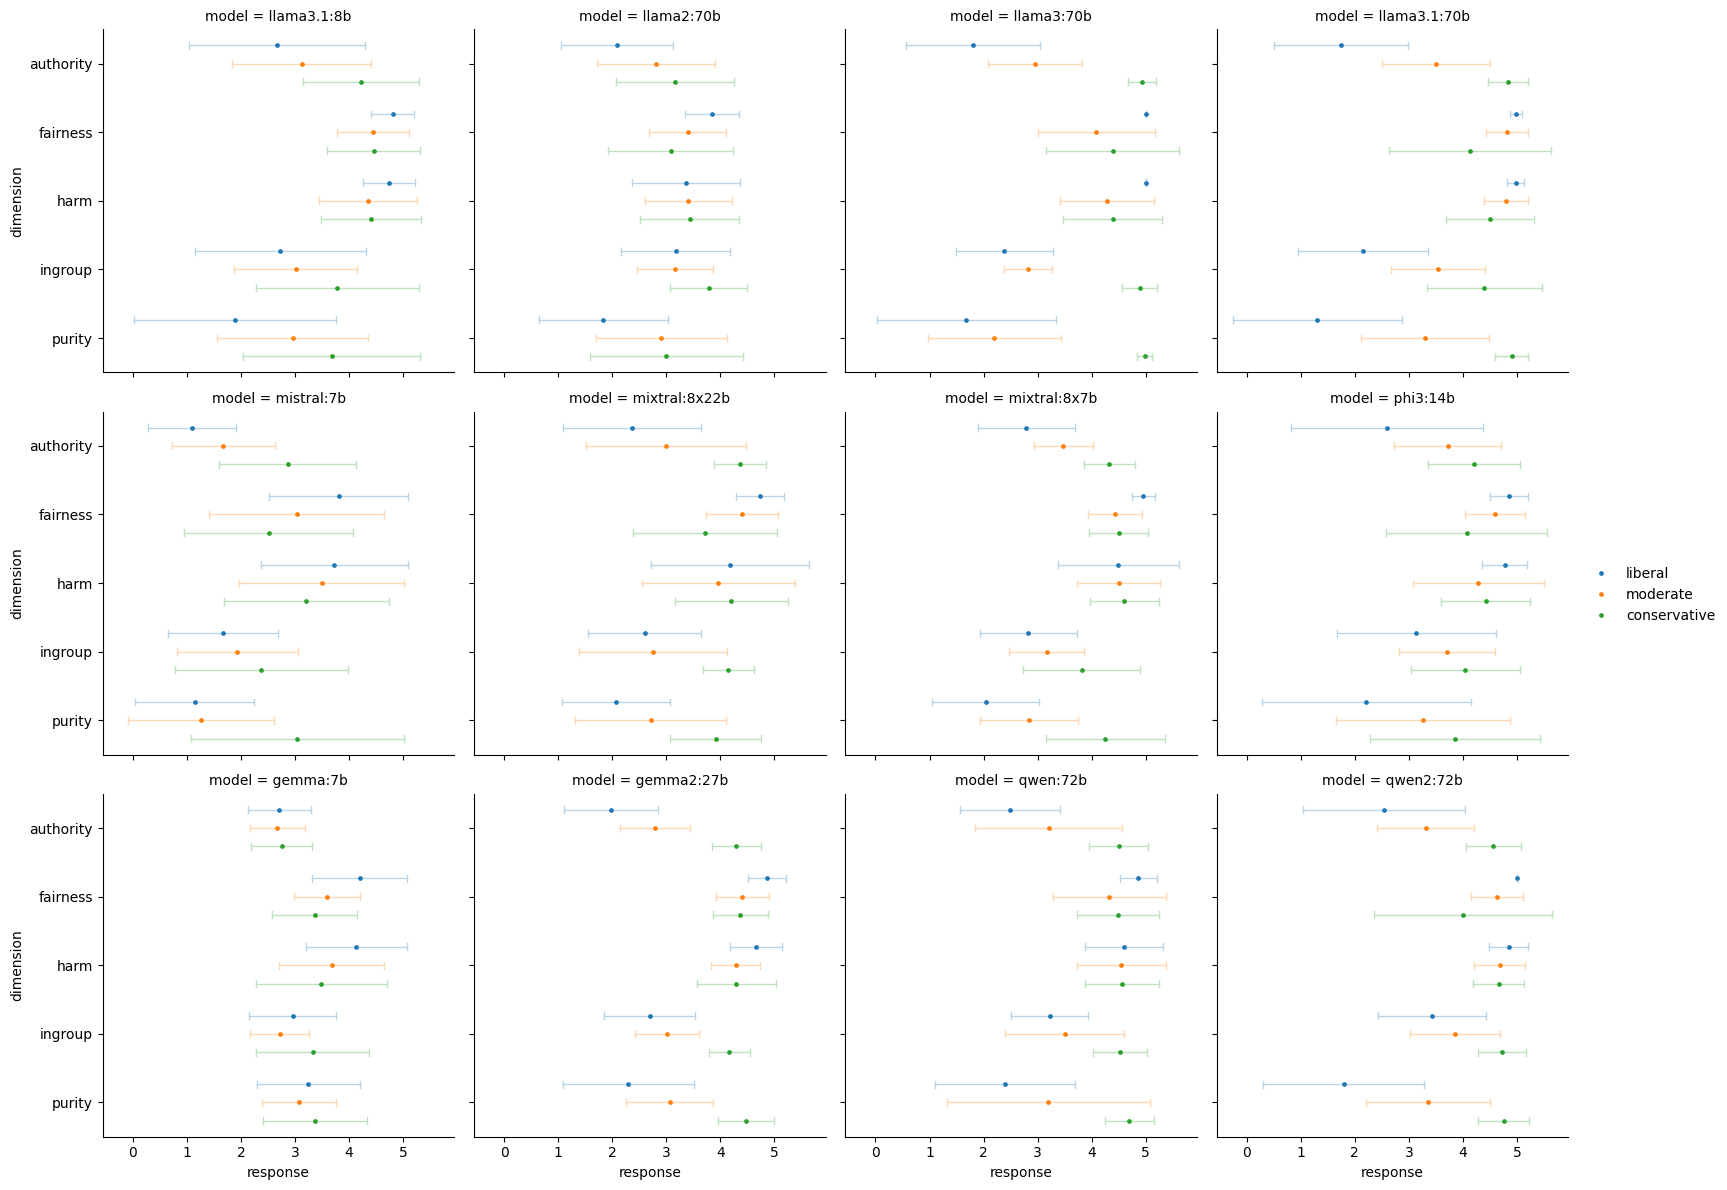

In [ ]:
dataset.plot("./report/points.by.model_persona_dimension.pdf")

In [ ]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

sample                     anonymous                               us  \
group                        liberal  moderate conservative   liberal   
model         persona                                                   
llama3.1:8b   liberal       0.389333  0.622000     0.946000  0.864000   
              moderate      0.475333  0.244000     0.444000  1.075333   
              conservative  1.008000  0.758000     0.754000  1.608000   
llama2:70b    liberal       0.507333  0.557333     0.590667  0.452667   
              moderate      0.754000  0.280000     0.232000  0.854000   
              conservative  1.027450  0.517450     0.353450  1.127450   
llama3:70b    liberal       0.488000  0.998000     1.322000  0.713333   
              moderate      0.276000  0.310000     0.574000  0.769333   
              conservative  1.614667  1.364667     1.360667  2.214667   
llama3.1:70b  liberal       0.610667  1.120667     1.444667  0.596000   
              moderate      0.892000  0.642000     0.676667  1.492000   
              conservative  1.540000  1.202000     1.198000  2.052000   
mistral:7b    liberal       0.813521  1.063521     1.220488  0.286488   
              moderate      0.823268  1.073268     1.077268  0.248458   
              conservative  0.900562  0.590562     0.553727  0.951246   
mixtral:8x22b liberal       0.170000  0.544000     0.868000  0.687333   
              moderate      0.378667  0.243333     0.475333  0.864000   
              conservative  1.237333  0.808667     0.714000  1.578667   
mixtral:8x7b  liberal       0.384382  0.528096     0.852096  0.920382   
              moderate      0.582667  0.398000     0.554000  1.182667   
              conservative  1.199324  0.949324     0.945324  1.799324   
phi3:14b      liberal       0.414667  0.559333     0.835333  1.014667   
              moderate      0.812000  0.562000     0.614000  1.412000   
              conservative  1.131862  0.768618     0.764618  1.618618   
gemma:7b      liberal       0.456446  0.152855     0.377554  0.948778   
              moderate      0.579075  0.235089     0.280779  0.710696   
              conservative  0.858599  0.368599     0.177376  0.958599   
gemma2:27b    liberal       0.285333  0.679333     1.003333  0.796000   
              moderate      0.409333  0.162000     0.458000  1.009333   
              conservative  1.220000  0.970000     0.966000  1.820000   
qwen:72b      liberal       0.412034  0.528701     0.804701  1.012034   
              moderate      0.665785  0.405119     0.480851  1.255119   
              conservative  1.456004  1.206004     1.202004  2.056004   
qwen2:72b     liberal       0.582667  0.759333     1.035333  1.020000   
              moderate      0.863333  0.613333     0.630667  1.463333   
              conservative  1.581333  1.192667     1.188667  2.042667   

sample                                               korean            \
group                       moderate conservative   liberal  moderate   
model         persona                                                   
llama3.1:8b   liberal       0.619333     1.232000  0.809333  0.779333   
              moderate      0.705333     0.720667  0.815333  0.685333   
              conservative  1.238000     0.888000  1.348000  1.218000   
llama2:70b    liberal       0.374667     0.804667  0.392667  0.482667   
              moderate      0.288000     0.366000  0.418000  0.248000   
              conservative  0.571010     0.253846  0.701010  0.511010   
llama3:70b    liberal       0.958000     1.608000  0.880000  1.078000   
              moderate      0.400667     0.860000  0.590667  0.560667   
              conservative  1.844667     1.494667  1.954667  1.824667   
llama3.1:70b  liberal       1.080667     1.730667  0.970667  1.200667   
              moderate      1.122000     0.772000  1.232000  1.102000   
              conservative  1.682000     1.332000  1.792000  1.662000   
mistral:7b    liberal       0.856488     1.506488  0.7464

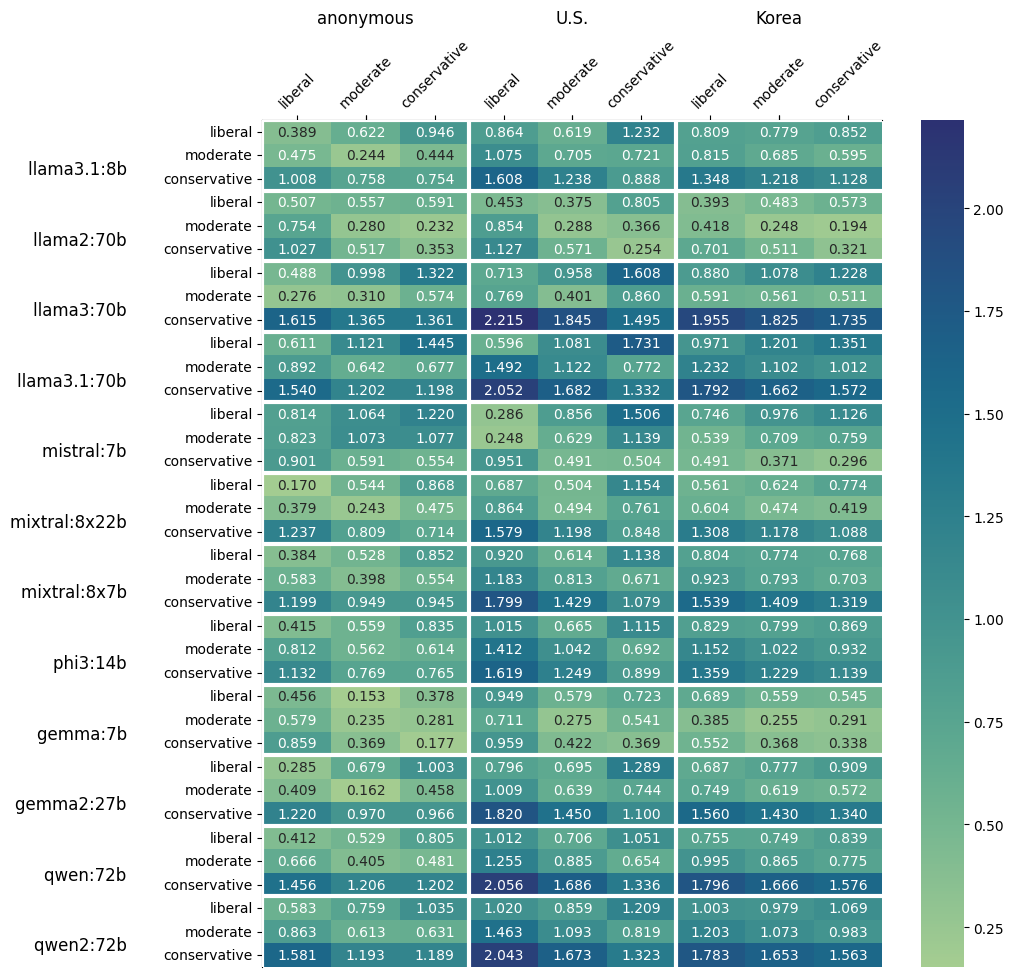

In [ ]:
cross_evaluation.plot("./report/heat.cross_evaluation.pdf")